In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('english_news_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'english_news_dataset.csv'

In [5]:
df.head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199706 entries, 0 to 199705
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Headline         199706 non-null  object
 1   Content          199706 non-null  object
 2   News Categories  199706 non-null  object
 3   Date             199706 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [7]:
import nltk

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
vds = SentimentIntensityAnalyzer()

In [11]:
df['Article'] = df['Headline'] + ' ' + df['Content']

In [12]:
df.head()

,Headline,Content,News Categories,Date,Article
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,Congress leader Baljinder Singh shot dead at h...
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,17-year-old girl preparing for NEET dies by su...
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,Hampers to welcome MPs in new Parliament tomor...
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,"Only 10% women lawmakers in RS, while only 14%..."
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,"Ganesh temple decorated with notes, coins wort..."


In [13]:
df1 = df.drop(columns=['Headline', 'Content', 'Date'])

In [14]:
df1.head()

,News Categories,Article
0,['national'],Congress leader Baljinder Singh shot dead at h...
1,['national'],17-year-old girl preparing for NEET dies by su...
2,['national'],Hampers to welcome MPs in new Parliament tomor...
3,['national'],"Only 10% women lawmakers in RS, while only 14%..."
4,['national'],"Ganesh temple decorated with notes, coins wort..."


In [15]:
categories = df1['News Categories'].value_counts()

In [16]:
def get_sentiment(article):
    score = vds.polarity_scores(article)

    if score['compound'] > 0.05:
        return '1'

    elif -0.05 < score['compound'] < 0.05:
        return '0'

    else:
        return '-1'

In [17]:
df2 = df.drop(columns=['Headline', 'Content', 'Date', 'News Categories'])

In [18]:
df1.head()

,News Categories,Article
0,['national'],Congress leader Baljinder Singh shot dead at h...
1,['national'],17-year-old girl preparing for NEET dies by su...
2,['national'],Hampers to welcome MPs in new Parliament tomor...
3,['national'],"Only 10% women lawmakers in RS, while only 14%..."
4,['national'],"Ganesh temple decorated with notes, coins wort..."


In [19]:
data = df1

In [21]:
# Download necessary NLTK resources
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import swifter
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords once and convert to a set for faster lookup
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in punctuation and word not in stop_words]
    # Join the tokens back into a string
    return " ".join(tokens)

data['cleaned'] = data['Article'].swifter.apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Pandas Apply: 100%|██████████| 199706/199706 [01:13<00:00, 2727.11it/s]


In [22]:
data['Sentiment'] = data['cleaned'].swifter.apply(get_sentiment)

Pandas Apply: 100%|██████████| 199706/199706 [01:17<00:00, 2562.27it/s]


In [23]:
data.head()

,News Categories,Article,cleaned,Sentiment
0,['national'],Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh shot dead home...,-1
1,['national'],17-year-old girl preparing for NEET dies by su...,17-year-old girl preparing neet dies suicide r...,-1
2,['national'],Hampers to welcome MPs in new Parliament tomor...,hampers welcome mps new parliament tomorrow pi...,1
3,['national'],"Only 10% women lawmakers in RS, while only 14%...",10 women lawmakers rs 14 ls inc 's kharge cong...,1
4,['national'],"Ganesh temple decorated with notes, coins wort...",ganesh temple decorated notes coins worth ₹2.5...,1


In [24]:
# downsample the data
# Convert to integer if the values are straightforward and correctly formatted
data['Sentiment'] = data['Sentiment'].astype(int)


In [25]:
# Assuming 'data' is your DataFrame and it contains a 'Sentiment' column
# Display current class distribution
print(data['Sentiment'].value_counts())

# Separate the classes
positive = data[data['Sentiment'] == 1]
negative = data[data['Sentiment'] == -1]
neutral = data[data['Sentiment'] == 0]

# Downsample positive and negative classes
positive_downsampled = positive.sample(n=len(neutral), random_state=42)
negative_downsampled = negative.sample(n=len(neutral), random_state=42)

# Combine the downsampled classes with the neutral class
downsampled_data = pd.concat([positive_downsampled, negative_downsampled, neutral])

# Shuffle the dataset to avoid any ordering bias in the future steps
downsampled_data = downsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(downsampled_data['Sentiment'].value_counts())


Sentiment
 1    110747
-1     72688
 0     16271
Name: count, dtype: int64
Sentiment
 1    16271
-1    16271
 0    16271
Name: count, dtype: int64


In [26]:
downsampled_data.head()

,News Categories,Article,cleaned,Sentiment
0,['business'],Air India borrows ₹998 crore from Japan's SMBC...,air india borrows ₹998 crore japan 's smbc buy...,1
1,['miscellaneous'],8 Toxic Workplace Habits That Are Draining You...,8 toxic workplace habits draining wallet jobs ...,1
2,"['world', 'Russia-Ukraine_Conflict']",May be able to support Ukraine's war efforts o...,may able support ukraine 's war efforts weeks ...,-1
3,['travel'],"White desert of the Great Rann of Kutch Kutch,...",white desert great rann kutch kutch often spel...,1
4,['startup'],Paytm now has more than a million shareholders...,paytm million shareholders india ceo ceo vijay...,0


In [27]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'Sentiment' column
# The default return is a sparse matrix; use `.toarray()` to convert it to a dense array if needed
sentiment_encoded = encoder.fit_transform(downsampled_data[['Sentiment']]).toarray()

# # Alternatively, to always receive a dense array directly:
# encoder = OneHotEncoder(sparse_output=False)  # This line will raise an error as it's incorrect

# # Correct approach without error:
# encoder = OneHotEncoder()
# sentiment_encoded_dense = encoder.fit_transform(df[['Sentiment']]).toarray()

# print(sentiment_encoded_dense)


In [29]:
import scipy.sparse

# If you need to convert a numpy array to a sparse matrix
if isinstance(sentiment_encoded, np.ndarray):
    # Convert numpy array to a sparse CSC (Compressed Sparse Column) matrix
    sentiment_encoded_sparse = scipy.sparse.csc_matrix(sentiment_encoded)


In [30]:
# Assuming sentiment_encoded is a sparse matrix but not necessarily CSC
if scipy.sparse.issparse(sentiment_encoded):
    sentiment_encoded_csc = sentiment_encoded.tocsc()  # Convert to CSC format


In [31]:
# Directly from sparse matrix (assuming it's in a suitable sparse format)
if scipy.sparse.issparse(sentiment_encoded):
    sentiment_df = pd.DataFrame.sparse.from_spmatrix(
        sentiment_encoded,
        columns=['Positive', 'Neutral', 'Negative']
    )


In [32]:
import pandas as pd

# Assuming sentiment_encoded is your numpy ndarray with shape (n_samples, 3)
# and the columns represent ['Positive', 'Neutral', 'Negative'] respectively
sentiment_df = pd.DataFrame(sentiment_encoded, columns=['Positive', 'Neutral', 'Negative'])


In [33]:
import pandas as pd

# Example setup if `downsampled_data` is your main DataFrame and it has a 'Sentiment' column
# We'll create a new DataFrame with one-hot encoding based on conditions
downsampled_data['Positive'] = (downsampled_data['Sentiment'] == 1).astype(int)
downsampled_data['Neutral'] = (downsampled_data['Sentiment'] == 0).astype(int)
downsampled_data['Negative'] = (downsampled_data['Sentiment'] == -1).astype(int)

# Now your downsampled_data includes one-hot encoded columns
print(downsampled_data[['Sentiment', 'Positive', 'Neutral', 'Negative']].head())


   Sentiment  Positive  Neutral  Negative
0          1         1        0         0
1          1         1        0         0
2         -1         0        0         1
3          1         1        0         0
4          0         0        1         0


In [34]:
# Quick check to make sure the encoding is correct
assert (downsampled_data[['Positive', 'Neutral', 'Negative']].sum(axis=1) == 1).all(), "Each row must have exactly one '1'"


In [35]:
downsampled_data.head()

,News Categories,Article,cleaned,Sentiment,Positive,Neutral,Negative
0,['business'],Air India borrows ₹998 crore from Japan's SMBC...,air india borrows ₹998 crore japan 's smbc buy...,1,1,0,0
1,['miscellaneous'],8 Toxic Workplace Habits That Are Draining You...,8 toxic workplace habits draining wallet jobs ...,1,1,0,0
2,"['world', 'Russia-Ukraine_Conflict']",May be able to support Ukraine's war efforts o...,may able support ukraine 's war efforts weeks ...,-1,0,0,1
3,['travel'],"White desert of the Great Rann of Kutch Kutch,...",white desert great rann kutch kutch often spel...,1,1,0,0
4,['startup'],Paytm now has more than a million shareholders...,paytm million shareholders india ceo ceo vijay...,0,0,1,0


In [36]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def stem_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a single string
    return ' '.join(stemmed_tokens)

# Apply stemming to the cleaned column
downsampled_data['stemmed'] = downsampled_data['cleaned'].apply(stem_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the stemmed text
X = vectorizer.fit_transform(downsampled_data['stemmed'])

# The variable 'X' now contains the TF-IDF matrix


In [38]:
y = downsampled_data[['Positive', 'Neutral', 'Negative']]


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

print(sklearn.__version__)  # This will print the version of scikit-learn to confirm it's correctly installed


1.4.2


In [41]:
import sklearn

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9209259448939875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      3333
           1       1.00      0.97      0.98      3209
           2       0.97      0.90      0.93      3221

   micro avg       0.98      0.92      0.95      9763
   macro avg       0.98      0.92      0.95      9763
weighted avg       0.98      0.92      0.95      9763
 samples avg       0.92      0.92      0.92      9763



e:\ML_Projects\News_Analyzer\envs\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
import numpy as np

# Assuming 'Positive' is 1, 'Neutral' is 0, and 'Negative' is -1
# Convert one-hot encoded vectors back to a single label per instance
y_train_single = np.argmax(y_train.values, axis=1) - 1  # Subtracting 1 to match your original encoding
y_test_single = np.argmax(y_test.values, axis=1) - 1

# Now train the SVM
model = LinearSVC(random_state=42)
model.fit(X_train, y_train_single)
y_pred = model.predict(X_test)


In [47]:
from sklearn.multiclass import OneVsRestClassifier

# Wrap LinearSVC in OneVsRestClassifier to handle multi-label data
model = OneVsRestClassifier(LinearSVC(random_state=42))
model.fit(X_train, y_train)  # y_train should be the multi-label format matrix
y_pred = model.predict(X_test)



In [48]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9159069958004712
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      3333
           1       0.94      0.96      0.95      3209
           2       0.95      0.92      0.94      3221

   micro avg       0.95      0.93      0.94      9763
   macro avg       0.95      0.93      0.94      9763
weighted avg       0.95      0.93      0.94      9763
 samples avg       0.92      0.93      0.92      9763



e:\ML_Projects\News_Analyzer\envs\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9434600020485506
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.94      0.94      3221
           0       0.93      0.97      0.95      3209
           1       0.95      0.92      0.94      3333

    accuracy                           0.94      9763
   macro avg       0.94      0.94      0.94      9763
weighted avg       0.94      0.94      0.94      9763



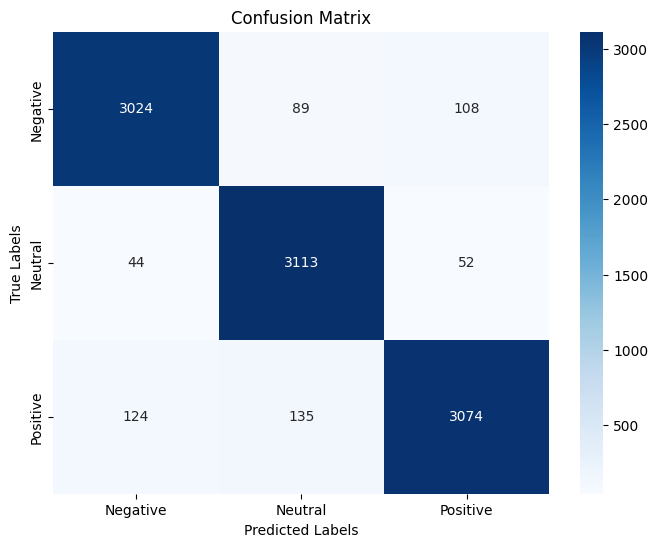

In [50]:
import numpy as np

# Assuming y_train is a DataFrame with columns for each class ['Negative', 'Neutral', 'Positive']
# Convert it from one-hot to single label format where:
# Negative is -1, Neutral is 0, Positive is 1

# Find the index of the max value in one-hot encoded rows, subtract 1 to align with your encoding
y_train_single = y_train.idxmax(axis=1).map({'Negative': -1, 'Neutral': 0, 'Positive': 1})
y_test_single = y_test.idxmax(axis=1).map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

# Now you can use these single labels for training a standard multiclass classifier
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=42)
model.fit(X_train, y_train_single)  # Make sure X_train is correctly prepared
y_pred = model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Accuracy:", accuracy_score(y_test_single, y_pred))
print("Classification Report:\n", classification_report(y_test_single, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_single, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [54]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Generate the classification report
report = classification_report(y_test_single, y_pred, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Calculate the overall accuracy
accuracy = accuracy_score(y_test_single, y_pred)

# Create a separate DataFrame for accuracy to keep structure consistent
accuracy_df = pd.DataFrame({
    'precision': [accuracy], 
    'recall': [accuracy],
    'f1-score': [accuracy]
}, index=['Accuracy'])

# Concatenate the accuracy DataFrame with the original report DataFrame
metrics_df = pd.concat([report_df, accuracy_df])

# Filter to include only the necessary rows and columns
metrics_df = metrics_df.loc[['Positive', 'Neutral', 'Negative', 'Accuracy'], ['precision', 'recall', 'f1-score']]


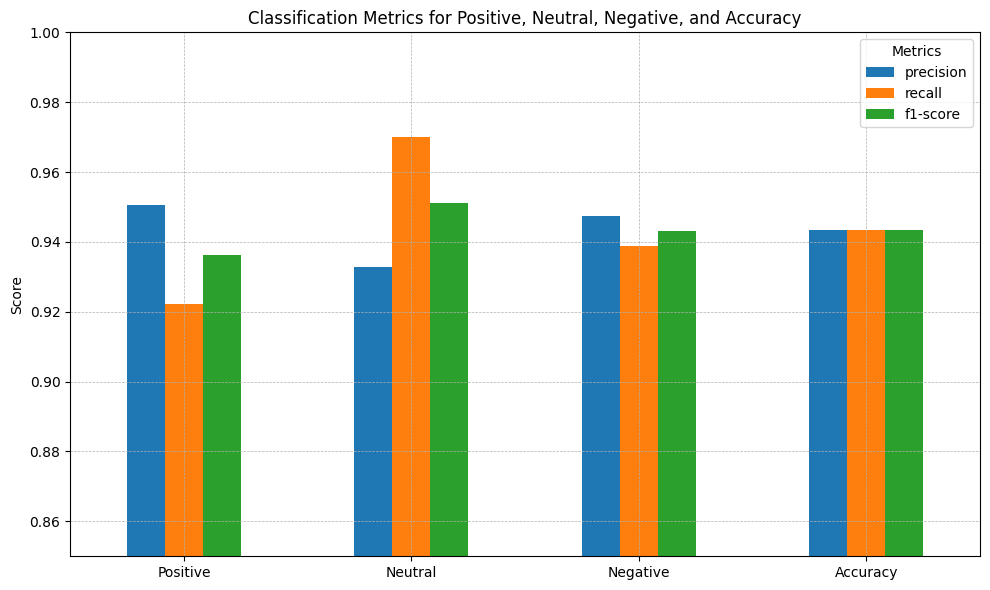

In [55]:
import matplotlib.pyplot as plt

# Plotting the metrics including accuracy
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.plot(kind='bar', ax=ax)
plt.title('Classification Metrics for Positive, Neutral, Negative, and Accuracy')
plt.ylabel('Score')
plt.ylim(0.85, 1.00)  # Set the y-axis to show 85% to 100%
plt.xticks(rotation=0)  # Rotate labels to make them readable
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


In [56]:
from joblib import dump

# Save the model to disk
dump(model, 'svm_sentiment_model.joblib')

# Assuming 'vectorizer' is your TfidfVectorizer
dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [57]:
import pandas as pd
from joblib import load
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Load the saved model and vectorizer
model = load('svm_sentiment_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')

# Define the text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    stemmer = PorterStemmer()

    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in punctuation and word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a string
    return " ".join(stemmed_tokens)

# Prediction function
def predict_sentiment(data):
    # Apply the preprocessing to the 'Article' column
    data['cleaned'] = data['Article'].apply(preprocess_text)
    # Vectorize the processed text
    features = vectorizer.transform(data['cleaned'])
    # Predict sentiment
    predictions = model.predict(features)
    # Map numeric predictions back to sentiment labels
    data['Sentiment'] = predictions
    data['Sentiment'] = data['Sentiment'].map({1: 'Positive', 0: 'Neutral', -1: 'Negative'})
    return data

# Example usage with new data



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
new_data = pd.read_excel('Assignment.xlsx')
result_data = predict_sentiment(new_data)

In [64]:
result_data

,Article,cleaned,Sentiment
0,"Retailers, the makers of foods marketed for we...",retail maker food market weight loss type comp...,Positive
1,"Move over, Ozempic — there’s a new drug in tow...",move ozemp — ’ new drug town eli lilli ’ zepbo...,Negative
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,sept 14 reuter bristol myer squibb bmy.n said ...,Negative
3,Austin Wolcott was 18 years old and pretty sur...,austin wolcott 18 year old pretti sure ’ survi...,Negative
4,"Cancer, often referred to as the “emperor of a...",cancer often refer “ emperor maladi ” unyield ...,Negative
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,nov 28 reuter u.s. food drug administr fda sai...,Negative
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,nov 21 reuter beigen 6160.hk said tuesday ente...,Positive
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,sept 19 reuter drugmak beigen 6160.hk said tue...,Negative
8,BRUKINSA is the first and only BTK inhibitor a...,brukinsa first btk inhibitor approv follicular...,Positive
9,Whether you're looking for a quick bite to eat...,whether 're look quick bite eat sit-down exper...,Positive


In [97]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import heapq
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def nltk_summarize(text, n_sentences=2):
    stop_words = set(stopwords.words('english'))
    # Include punctuation in the stopwords set
    punctuation = set(string.punctuation)
    all_unwanted = stop_words.union(punctuation)
    
    # Tokenize and filter out stopwords and punctuation, and count word frequencies
    word_frequencies = FreqDist(word.lower() for word in word_tokenize(text) if word.lower() not in all_unwanted and word.isalnum())
    
    # Score sentences based on word frequencies, considering only non-stopword, alphanumeric words
    sentence_scores = {}
    for sentence in sent_tokenize(text):
        for word in word_tokenize(sentence.lower()):
            if word in word_frequencies:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_frequencies[word]
                else:
                    sentence_scores[sentence] += word_frequencies[word]

    # Select the n highest scoring sentences
    summary_sentences = heapq.nlargest(n_sentences, sentence_scores, key=sentence_scores.get)
    return ' '.join(summary_sentences)

# Example text with multiple sentences
text = """
The rapid advancements in artificial intelligence have begun to impact the healthcare sector significantly. AI technologies are used in various aspects of health services, including diagnostics, treatment plans, drug development, and patient management. Companies like IBM and Google are at the forefront, developing algorithms that help process vast amounts of medical data to assist doctors and researchers. These tools not only speed up diagnosis but also enhance the accuracy of treatment protocols and predictions. Furthermore, AI is instrumental in personalizing patient care by analyzing patterns from numerous health records to predict individual health risks and outcomes more accurately.
"""

# Summarize the text, requesting fewer sentences than are present in the original text
summary = nltk_summarize(text, n_sentences=2)
print(summary)


Furthermore, AI is instrumental in personalizing patient care by analyzing patterns from numerous health records to predict individual health risks and outcomes more accurately. AI technologies are used in various aspects of health services, including diagnostics, treatment plans, drug development, and patient management.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
## pipeline sentiment on article 

import pandas as pd
from joblib import load
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the saved models
model = load('svm_sentiment_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')

def preprocess_text(text):
    """Preprocess text by removing stopwords, punctuation, and applying stemming."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in stop_words and word.isalnum()]
    return " ".join(tokens)

def predict_sentiment(text):
    """Predict sentiment of the preprocessed text."""
    cleaned_text = preprocess_text(text)
    features = vectorizer.transform([cleaned_text])
    prediction = model.predict(features)[0]
    return {1: 'Positive', 0: 'Neutral', -1: 'Negative'}.get(prediction, 'Neutral')

def nltk_summarize(text, n_sentences=2):
    """Generate a summary of the given text."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    word_frequencies = FreqDist(word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalnum())
    sentence_scores = {}
    for sentence in sent_tokenize(text):
        for word in word_tokenize(sentence.lower()):
            if word in word_frequencies:
                sentence_scores[sentence] = sentence_scores.get(sentence, 0) + word_frequencies[word]
    summary_sentences = heapq.nlargest(n_sentences, sentence_scores, key=sentence_scores.get)
    return ' '.join(summary_sentences)

def process_articles(file_path):
    """Read the Excel file, process each article for sentiment and summarization, and save the results."""
    data = pd.read_excel(file_path)
    data['Sentiment'] = data['Article'].apply(predict_sentiment)
    data['Summary'] = data['Article'].apply(lambda x: nltk_summarize(x, n_sentences=2))
    output_path = 'processed_articles.xlsx'
    data.to_excel(output_path, index=False)

# Example usage
process_articles('Assignment.xlsx')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
## Pipeline sentiment on summery  

import pandas as pd
from joblib import load
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the saved models
model = load('svm_sentiment_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')

def preprocess_text(text):
    """Preprocess text by removing stopwords, punctuation, and applying stemming."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in stop_words and word.isalnum()]
    return " ".join(tokens)

def predict_sentiment(text):
    """Predict sentiment of the preprocessed text."""
    cleaned_text = preprocess_text(text)
    features = vectorizer.transform([cleaned_text])
    prediction = model.predict(features)[0]
    return {1: 'Positive', 0: 'Neutral', -1: 'Negative'}.get(prediction, 'Neutral')

def nltk_summarize(text, n_sentences=2):
    """Generate a summary of the given text."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    word_frequencies = FreqDist(word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalnum())
    sentence_scores = {}
    for sentence in sent_tokenize(text):
        for word in word_tokenize(sentence.lower()):
            if word in word_frequencies:
                sentence_scores[sentence] = sentence_scores.get(sentence, 0) + word_frequencies[word]
    summary_sentences = heapq.nlargest(n_sentences, sentence_scores, key=sentence_scores.get)
    return ' '.join(summary_sentences)

def process_articles(file_path):
    """Read the Excel file, summarize each article, run sentiment analysis on the summary, and save the results."""
    data = pd.read_excel(file_path)
    data['Summary'] = data['Article'].apply(lambda x: nltk_summarize(x, n_sentences=2))
    data['Sentiment'] = data['Summary'].apply(predict_sentiment)
    output_path = 'summarized_sentiment_articles.xlsx'
    data.to_excel(output_path, index=False)

# Example usage
process_articles('Assignment.xlsx')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load data from Excel
def load_data(file_path):
    data = pd.read_excel(file_path)
    return data['Article'].dropna()  # Assuming the text data is under the 'Article' column

# Preprocess and vectorize data
def preprocess_and_vectorize(data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data)
    return tfidf, tfidf_vectorizer

# Perform LDA Topic Modeling
def lda_topic_modeling(tfidf, n_topics=5):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(tfidf)
    return lda

# Display top words for each topic using the correct method
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Main function to run the analysis
def analyze_text(file_path, n_topics=5, no_top_words=10):
    articles = load_data(file_path)
    tfidf, vectorizer = preprocess_and_vectorize(articles)
    lda_model = lda_topic_modeling(tfidf, n_topics)
    display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

# Example usage
analyze_text('Assignment.xlsx')


Topic 0:
taco bell beigene drug yum pizza brands sales hut nacho
Topic 1:
account taco nike delivery strava restaurant billion bristol oct company
Topic 2:
hours court check lawsuit location york local according vary labor
Topic 3:
car cells cancer nike weight therapies therapy obesity drugs fda
Topic 4:
nike said companies sauce advertising strava judge mcdonald burger food


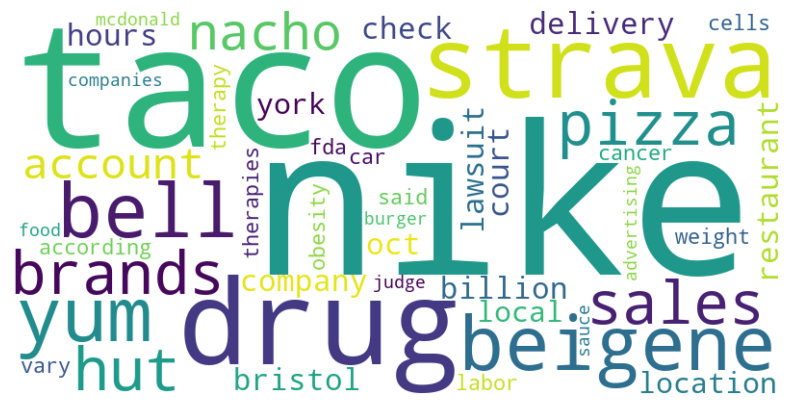

In [124]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_excel(file_path)
    return data['Article'].dropna()

def preprocess_and_vectorize(data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data)
    return tfidf, tfidf_vectorizer

def lda_topic_modeling(tfidf, n_topics=5):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(tfidf)
    return lda

def get_top_words(model, feature_names, no_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_words.extend(topic_words)
    return top_words

def generate_word_cloud(words):
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def analyze_text(file_path, n_topics=5, no_top_words=10):
    articles = load_data(file_path)
    tfidf, vectorizer = preprocess_and_vectorize(articles)
    lda_model = lda_topic_modeling(tfidf, n_topics)
    top_words = get_top_words(lda_model, vectorizer.get_feature_names_out(), no_top_words)
    generate_word_cloud(top_words)

# Example usage
analyze_text('Assignment.xlsx')


In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(cleaned_text)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


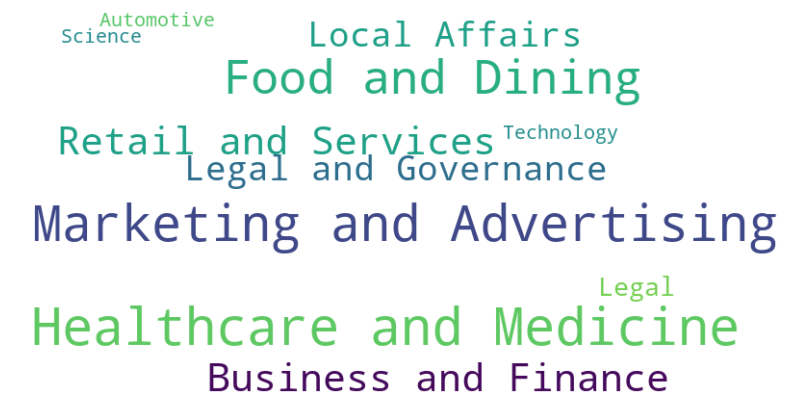

In [135]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt


categories = {
    'Food and Dining': [
        'taco', 'bell', 'yum', 'pizza', 'hut', 'nacho', 'restaurant', 'dining', 'cuisine', 'meal', 'eatery', 'diner'
    ],
    'Business and Finance': [
        'account', 'billion', 'company', 'sales', 'brands', 'finance', 'economic', 'commercial', 'corporate', 'trade'
    ],
    'Legal and Governance': [
        'hours', 'court', 'lawsuit', 'judge', 'legal', 'law', 'regulation', 'compliance', 'litigation', 'judiciary'
    ],
    'Healthcare and Medicine': [
        'car', 'cells', 'cancer', 'weight', 'therapies', 'therapy', 'obesity', 'drugs', 'fda', 'medical', 'health', 'clinical', 'hospital', 'surgery', 'treatment', 'pharmaceutical'
    ],
    'Marketing and Advertising': [
        'nike', 'advertising', 'mcdonald', 'burger', 'food', 'strava', 'marketing', 'promotion', 'branding', 'campaign', 'market'
    ],
    'Local Affairs': [
        'location', 'local', 'vary', 'according', 'regional', 'municipal', 'city', 'community', 'town'
    ],
    'Retail and Services': [
        'delivery', 'company', 'oct', 'bristol', 'retail', 'service', 'customer', 'sale', 'store', 'shop', 'outlet'
    ],
    'Technology': [
        'software', 'hardware', 'ai', 'cloud', 'internet', 'computer', 'technology', 'digital', 'data', 'network', 'IT', 'machine learning', 'tech', 'innovation'
    ],
    'Sports': [
        'sports', 'game', 'tournament', 'athlete', 'team', 'match', 'competition', 'sporting', 'player', 'coach'
    ],
    'Entertainment': [
        'movie', 'music', 'concert', 'festival', 'celebrity', 'entertainment', 'show', 'performance', 'star', 'theater'
    ],
    'Politics': [
        'politics', 'policy', 'government', 'election', 'democracy', 'political', 'campaign', 'vote', 'legislature'
    ],
    'Environment': [
        'environment', 'climate', 'energy', 'conservation', 'wildlife', 'ecology', 'sustainable', 'nature', 'pollution'
    ],
    'Education': [
        'education', 'school', 'university', 'student', 'learning', 'academic', 'scholar', 'educational', 'campus'
    ],
    'Travel': [
        'travel', 'tourism', 'destination', 'flight', 'accommodation', 'journey', 'trip', 'explore', 'tourist'
    ],
    'Science': [
        'science', 'research', 'space', 'technology', 'lab', 'scientific', 'experiment', 'study', 'biology'
    ],
    'Legal': [
        'law', 'legal', 'court', 'justice', 'lawyer', 'attorney', 'case', 'litigation', 'sue', 'legislation'
    ],
    'E-commerce': [
        'shopping', 'online', 'ecommerce', 'retail', 'buy', 'sell', 'marketplace', 'trade', 'digital commerce'
    ],
    'Automotive': [
        'car', 'vehicle', 'automotive', 'engine', 'driving', 'auto', 'motor', 'road', 'transport'
    ],
    'Real Estate': [
        'real estate', 'property', 'housing', 'construction', 'building', 'residential', 'commercial', 'estate', 'land'
    ]
}



def load_data(file_path):
    data = pd.read_excel(file_path)
    return data['Article'].dropna()

def preprocess_and_vectorize(data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data)
    return tfidf, tfidf_vectorizer

def lda_topic_modeling(tfidf, n_topics=5):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(tfidf)
    return lda

def get_top_words(model, feature_names, no_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_words.extend(topic_words)
    return top_words

def classify_keywords(top_words, categories):
    category_counts = {category: 0 for category in categories}
    for word in top_words:
        for category, keywords in categories.items():
            if any(keyword in word for keyword in keywords):
                category_counts[category] += 1
    return {category: count for category, count in category_counts.items() if count > 0}

def generate_word_cloud(category_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(category_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def analyze_text(file_path, n_topics=5, no_top_words=10):
    articles = load_data(file_path)
    tfidf, vectorizer = preprocess_and_vectorize(articles)
    lda_model = lda_topic_modeling(tfidf, n_topics)
    top_words = get_top_words(lda_model, vectorizer.get_feature_names_out(), no_top_words)
    categorized_results = classify_keywords(top_words, categories)
    generate_word_cloud(categorized_results)

analyze_text('Assignment.xlsx')


In [138]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Category dictionary as provided
categories = {
    'General Business': [
        'finance', 'economic', 'investment', 'trade', 'corporate', 'commercial'
    ],
    'Legal and Politics': [
        'lawsuit', 'legal', 'law', 'regulation', 'politics', 'election', 'policy', 'government'
    ],
    'Health and Medicine': [
        'health', 'medical', 'therapy', 'surgery', 'clinical', 'pharmaceutical', 'disease', 
        'cancer', 'medicine', 'fda', 'treatment', 'healthcare', 'nursing', 'diagnosis', 
        'patient', 'hospital', 'doctor', 'nurse', 'drug', 'vaccine', 'mental health'
    ],
    'Science and Technology': [
        'technology', 'innovation', 'science', 'research', 'digital', 'data', 'ai', 'machine learning',
        'biotechnology', 'engineering', 'robotics', 'quantum', 'tech'
    ],
    'Arts and Entertainment': [
        'movie', 'music', 'theater', 'festival', 'entertainment', 'concert', 'celebrity', 'art', 'culture'
    ],
    'Environment and Energy': [
        'environment', 'climate', 'energy', 'conservation', 'sustainable', 'pollution', 'wildlife', 'ecology', 'nature'
    ],
    'Education': [
        'education', 'university', 'school', 'student', 'academic', 'learning', 'scholarship', 'campus', 'teacher', 'curriculum'
    ],
    'Travel and Lifestyle': [
        'travel', 'tourism', 'accommodation', 'lifestyle', 'leisure', 'destination', 'adventure', 'holiday', 'tourist'
    ],
    'Sports': [
        'sports', 'athlete', 'tournament', 'game', 'competition', 'team', 'match', 'sporting', 'coach'
    ],
    'Real Estate and Infrastructure': [
        'real estate', 'property', 'construction', 'infrastructure', 'housing', 'development', 'building', 'realty'
    ],
    'Retail and Consumer Goods': [
        'retail', 'shopping', 'consumer', 'brand', 'store', 'product', 'market', 'sales', 'customer'
    ],
    'Food and Dining': [
        'food', 'restaurant', 'cuisine', 'meal', 'diner', 'eatery', 'dining', 'cooking', 'gourmet', 
        'chef', 'culinary', 'menu', 'bistro', 'cafe', 'nutrition', 'organic', 'eat', 'drink', 'taste'
    ]
}


# Load data from Excel
def load_data(file_path):
    return pd.read_excel(file_path)

# Preprocess and vectorize data
def preprocess_and_vectorize(data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data['Article'])
    return tfidf, tfidf_vectorizer

# Perform LDA Topic Modeling
def lda_topic_modeling(tfidf, n_topics=5):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(tfidf)
    return lda

# Extract top words for each topic
def get_top_words(model, feature_names, no_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_words.extend(topic_words)
    return top_words

# Identify themes based on top words and categories
def identify_themes(top_words, categories):
    theme_identified = set()
    for word in top_words:
        for category, keywords in categories.items():
            if word in keywords:
                theme_identified.add(category)
    return ', '.join(theme_identified)

# Main function to run the analysis and save to Excel
def analyze_text(file_path, n_topics=5, no_top_words=10):
    data = load_data(file_path)
    tfidf, vectorizer = preprocess_and_vectorize(data)
    lda_model = lda_topic_modeling(tfidf, n_topics)
    top_words = get_top_words(lda_model, vectorizer.get_feature_names_out(), no_top_words)
    
    # Assign themes to each article
    data['Theme'] = data['Article'].apply(lambda x: identify_themes(x.split(), categories))
    
    # Save the DataFrame with themes back to Excel
    data.to_excel('Processed_Articles_with_Themes.xlsx', index=False)

# Example usage
analyze_text('Assignment.xlsx')


In [140]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter

# Define categories and their keywords
categories = {
    'General Business': [
        'finance', 'economic', 'investment', 'trade', 'corporate', 'commercial'
    ],
    'Legal and Politics': [
        'lawsuit', 'legal', 'law', 'regulation', 'politics', 'election', 'policy', 'government'
    ],
    'Health and Medicine': [
        'health', 'medical', 'therapy', 'surgery', 'clinical', 'pharmaceutical', 'disease', 
        'cancer', 'medicine', 'fda', 'treatment', 'healthcare', 'nursing', 'diagnosis', 
        'patient', 'hospital', 'doctor', 'nurse', 'drug', 'vaccine', 'mental health'
    ],
    'Science and Technology': [
        'technology', 'innovation', 'science', 'research', 'digital', 'data', 'ai', 'machine learning',
        'biotechnology', 'engineering', 'robotics', 'quantum', 'tech'
    ],
    'Arts and Entertainment': [
        'movie', 'music', 'theater', 'festival', 'entertainment', 'concert', 'celebrity', 'art', 'culture'
    ],
    'Environment and Energy': [
        'environment', 'climate', 'energy', 'conservation', 'sustainable', 'pollution', 'wildlife', 'ecology', 'nature'
    ],
    'Education': [
        'education', 'university', 'school', 'student', 'academic', 'learning', 'scholarship', 'campus', 'teacher', 'curriculum'
    ],
    'Travel and Lifestyle': [
        'travel', 'tourism', 'accommodation', 'lifestyle', 'leisure', 'destination', 'adventure', 'holiday', 'tourist'
    ],
    'Sports': [
        'sports', 'athlete', 'tournament', 'game', 'competition', 'team', 'match', 'sporting', 'coach'
    ],
    'Real Estate and Infrastructure': [
        'real estate', 'property', 'construction', 'infrastructure', 'housing', 'development', 'building', 'realty'
    ],
    'Retail and Consumer Goods': [
        'retail', 'shopping', 'consumer', 'brand', 'store', 'product', 'market', 'sales', 'customer'
    ],
    'Food and Dining': [
        'food', 'restaurant', 'cuisine', 'meal', 'diner', 'eatery', 'dining', 'cooking', 'gourmet', 
        'chef', 'culinary', 'menu', 'bistro', 'cafe', 'nutrition', 'organic', 'eat', 'drink', 'taste'
    ]
}
def load_data(file_path):
    return pd.read_excel(file_path)

def get_relevant_category(text, categories):
    words = word_tokenize(text.lower())
    word_freq = Counter(words)
    highest_score = 0
    relevant_category = 'None'

    for category, keywords in categories.items():
        category_score = sum(word_freq[word] for word in keywords if word in word_freq)
        if category_score > highest_score:
            highest_score = category_score
            relevant_category = category

    return relevant_category

def categorize_articles(data, categories):
    data['Theme'] = data['Article'].apply(lambda x: get_relevant_category(x, categories))
    return data

def save_to_excel(data, output_file='Processed_Articles_with_Single_Theme.xlsx'):
    data.to_excel(output_file, index=False)

def main(file_path):
    data = load_data(file_path)
    categorized_data = categorize_articles(data, categories)
    save_to_excel(categorized_data)

# Example usage
main('Assignment.xlsx')


In [141]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define categories and their keywords with weights
categories = {
    'General Business': {
        'finance': 3, 'economic': 2, 'investment': 3, 'trade': 2, 'corporate': 2, 'commercial': 2
    },
    'Legal and Politics': {
        'lawsuit': 3, 'legal': 2, 'law': 2, 'regulation': 2, 'politics': 3, 'election': 3, 'policy': 2, 'government': 3
    },
    'Health and Medicine': {
        'health': 3, 'medical': 3, 'therapy': 2, 'surgery': 2, 'clinical': 3, 'pharmaceutical': 3, 'disease': 3,
        'cancer': 5, 'medicine': 4, 'fda': 4, 'treatment': 3, 'healthcare': 3, 'nursing': 2, 'diagnosis': 3,
        'patient': 2, 'hospital': 3, 'doctor': 3, 'nurse': 2, 'drug': 2, 'vaccine': 4, 'mental health': 3
    },
    'Science and Technology': {
        'technology': 4, 'innovation': 3, 'science': 3, 'research': 3, 'digital': 2, 'data': 2, 'ai': 4,
        'machine learning': 4, 'biotechnology': 3, 'engineering': 2, 'robotics': 3, 'quantum': 2, 'tech': 2
    },
    'Arts and Entertainment': {
        'movie': 2, 'music': 2, 'theater': 2, 'festival': 2, 'entertainment': 3, 'concert': 2, 'celebrity': 2,
        'art': 2, 'culture': 2
    },
    'Environment and Energy': {
        'environment': 4, 'climate': 4, 'energy': 3, 'conservation': 3, 'sustainable': 3, 'pollution': 3,
        'wildlife': 2, 'ecology': 3, 'nature': 2
    },
    'Education': {
        'education': 4, 'university': 3, 'school': 3, 'student': 2, 'academic': 2, 'learning': 2,
        'scholarship': 2, 'campus': 2, 'teacher': 2, 'curriculum': 2
    },
    'Travel and Lifestyle': {
        'travel': 3, 'tourism': 2, 'accommodation': 2, 'lifestyle': 2, 'leisure': 2, 'destination': 3,
        'adventure': 2, 'holiday': 2, 'tourist': 2
    },
    'Sports': {
        'sports': 4, 'athlete': 2, 'tournament': 3, 'game': 2, 'competition': 2, 'team': 2, 'match': 2,
        'sporting': 2, 'coach': 2
    },
    'Real Estate and Infrastructure': {
        'real estate': 4, 'property': 3, 'construction': 3, 'infrastructure': 3, 'housing': 2,
        'development': 2, 'building': 2, 'realty': 2
    },
    'Retail and Consumer Goods': {
        'retail': 3, 'shopping': 2, 'consumer': 2, 'brand': 2, 'store': 2, 'product': 2, 'market': 2,
        'sales': 2, 'customer': 2
    },
    'Food and Dining': {
        'food': 3, 'restaurant': 3, 'cuisine': 2, 'meal': 2, 'diner': 2, 'eatery': 2, 'dining': 2,
        'cooking': 2, 'gourmet': 2, 'chef': 2, 'culinary': 2, 'menu': 2, 'bistro': 2, 'cafe': 2,
        'nutrition': 3, 'organic': 2, 'eat': 2, 'drink': 2, 'taste': 2
    }
}


def load_data(file_path):
    return pd.read_excel(file_path)

def get_relevant_category(text, categories):
    words = word_tokenize(text.lower())
    word_freq = Counter(words)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]

    highest_score = 0
    relevant_category = 'None'

    for category, keywords in categories.items():
        category_score = sum(word_freq[word] * weight for word, weight in keywords.items() if word in filtered_words)
        if category_score > highest_score:
            highest_score = category_score
            relevant_category = category

    return relevant_category

def categorize_articles(data, categories):
    data['Theme'] = data['Article'].apply(lambda x: get_relevant_category(x, categories))
    return data

def save_to_excel(data, output_file='Processed_Articles_with_Single_Theme.xlsx'):
    data.to_excel(output_file, index=False)

def main(file_path):
    data = load_data(file_path)
    categorized_data = categorize_articles(data, categories)
    save_to_excel(categorized_data)

# Example usage
main('Assignment.xlsx')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
import pandas as pd
from joblib import load
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the saved models for sentiment analysis
model = load('svm_sentiment_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')

# Define categories and their keywords with weights for categorization
categories = {
    'General Business': {
        'finance': 3, 'economic': 2, 'investment': 3, 'trade': 2, 'corporate': 2, 'commercial': 2
    },
    'Legal and Politics': {
        'lawsuit': 3, 'legal': 2, 'law': 2, 'regulation': 2, 'politics': 3, 'election': 3, 'policy': 2, 'government': 3
    },
    'Health and Medicine': {
        'health': 3, 'medical': 3, 'therapy': 2, 'surgery': 2, 'clinical': 3, 'pharmaceutical': 3, 'disease': 3,
        'cancer': 5, 'medicine': 4, 'fda': 4, 'treatment': 3, 'healthcare': 3, 'nursing': 2, 'diagnosis': 3,
        'patient': 2, 'hospital': 3, 'doctor': 3, 'nurse': 2, 'drug': 2, 'vaccine': 4, 'mental health': 3
    },
    'Science and Technology': {
        'technology': 4, 'innovation': 3, 'science': 3, 'research': 3, 'digital': 2, 'data': 2, 'ai': 4,
        'machine learning': 4, 'biotechnology': 3, 'engineering': 2, 'robotics': 3, 'quantum': 2, 'tech': 2
    },
    'Arts and Entertainment': {
        'movie': 2, 'music': 2, 'theater': 2, 'festival': 2, 'entertainment': 3, 'concert': 2, 'celebrity': 2,
        'art': 2, 'culture': 2
    },
    'Environment and Energy': {
        'environment': 4, 'climate': 4, 'energy': 3, 'conservation': 3, 'sustainable': 3, 'pollution': 3,
        'wildlife': 2, 'ecology': 3, 'nature': 2
    },
    'Education': {
        'education': 4, 'university': 3, 'school': 3, 'student': 2, 'academic': 2, 'learning': 2,
        'scholarship': 2, 'campus': 2, 'teacher': 2, 'curriculum': 2
    },
    'Travel and Lifestyle': {
        'travel': 3, 'tourism': 2, 'accommodation': 2, 'lifestyle': 2, 'leisure': 2, 'destination': 3,
        'adventure': 2, 'holiday': 2, 'tourist': 2
    },
    'Sports': {
        'sports': 4, 'athlete': 2, 'tournament': 3, 'game': 2, 'competition': 2, 'team': 2, 'match': 2,
        'sporting': 2, 'coach': 2
    },
    'Real Estate and Infrastructure': {
        'real estate': 4, 'property': 3, 'construction': 3, 'infrastructure': 3, 'housing': 2,
        'development': 2, 'building': 2, 'realty': 2
    },
    'Retail and Consumer Goods': {
        'retail': 3, 'shopping': 2, 'consumer': 2, 'brand': 2, 'store': 2, 'product': 2, 'market': 2,
        'sales': 2, 'customer': 2
    },
    'Food and Dining': {
        'food': 3, 'restaurant': 3, 'cuisine': 2, 'meal': 2, 'diner': 2, 'eatery': 2, 'dining': 2,
        'cooking': 2, 'gourmet': 2, 'chef': 2, 'culinary': 2, 'menu': 2, 'bistro': 2, 'cafe': 2,
        'nutrition': 3, 'organic': 2, 'eat': 2, 'drink': 2, 'taste': 2
    }
}


def preprocess_text(text):
    """Preprocess text by removing stopwords, punctuation, and applying stemming."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in stop_words and word.isalnum()]
    return " ".join(tokens)

def predict_sentiment(text):
    """Predict sentiment of the preprocessed text."""
    cleaned_text = preprocess_text(text)
    features = vectorizer.transform([cleaned_text])
    prediction = model.predict(features)[0]
    return {1: 'Positive', 0: 'Neutral', -1: 'Negative'}.get(prediction, 'Neutral')

def nltk_summarize(text, n_sentences=2):
    """Generate a summary of the given text."""
    stop_words = set(stopwords.words('english')) | set(string.punctuation)
    word_frequencies = FreqDist(word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalnum())
    sentence_scores = {}
    for sentence in sent_tokenize(text):
        for word in word_tokenize(sentence.lower()):
            if word in word_frequencies:
                sentence_scores[sentence] = sentence_scores.get(sentence, 0) + word_frequencies[word]
    summary_sentences = heapq.nlargest(n_sentences, sentence_scores, key=sentence_scores.get)
    return ' '.join(summary_sentences)

def get_relevant_category(text, categories):
    words = word_tokenize(text.lower())
    word_freq = Counter(words)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]

    highest_score = 0
    relevant_category = 'None'

    for category, keywords in categories.items():
        category_score = sum(word_freq[word] * weight for word, weight in keywords.items() if word in filtered_words)
        if category_score > highest_score:
            highest_score = category_score
            relevant_category = category

    return relevant_category

def process_articles(file_path):
    """Process each article for summary, sentiment, and categorization."""
    data = pd.read_excel(file_path)
    data['Summary'] = data['Article'].apply(lambda x: nltk_summarize(x, n_sentences=2))
    data['Sentiment'] = data['Summary'].apply(predict_sentiment)
    data['Theme'] = data['Article'].apply(lambda x: get_relevant_category(x, categories))
    output_path = 'final_processed_articles.xlsx'
    data.to_excel(output_path, index=False)

# Example usage
process_articles('Assignment.xlsx')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
vds.polarity_score("I am not okay")

AttributeError: 'SentimentIntensityAnalyzer' object has no attribute 'polarity_score'